In [ ]:
import pandas as pd
import numpy as np




In [ ]:
#read emissions csv

emissions= pd.read_csv("emission.csv")
emissions.set_index("Country Code")

#read population csv
population= pd.read_csv("populaiton country by year.csv")
population.set_index("Country Code")

#print(population.head())
population.set_index("Country Code")

#realign emissions

emissions2= emissions.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Value_of_Emissions")
print("emissions dataset \n" )
print(emissions2.head())

#calculate average emissions
average= emissions2["Value_of_Emissions"].mean()
print("\n average: ")
print(average)

#read temperature csv
temps= pd.read_csv("temperature.csv")
print("temp dataset \n" )
print(temps.head())



#realign population

population2= population.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Population")

print(population2.head())

#merge populaiton to emissions
new_df = emissions2.merge(population2, left_on=['Country Name','Year'], right_on = ['Country Name','Year'], how='left')

print("emissions and population \n")
print(new_df.head())
new_df["Total_emissions"] = new_df["Value_of_Emissions"] * new_df["Population"]
print("added new column \n")
print(new_df.head())

#make new df grouped by month and averaging temp change

print("temps new \n")
new_temps= temps.groupby(["Year", "Area"]).mean()

print("\n new temps \n")
print(new_temps)




In [369]:
#drop months from temps
nomonths_temps = temps
nomonths_temps = nomonths_temps.drop(['Months'], axis=1)
nomonths_temps = nomonths_temps.drop(['Months Code'], axis=1)

print(nomonths_temps.columns)


nomonths_temps2= nomonths_temps.groupby(["Year", "Area"]).mean()
nomonths_temps2.head()




Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')


Area Code (FAO)  Element Code  Year Code     Value
Year Area                                                              
1961 Afghanistan                 2.0        7271.0     1961.0 -0.017471
     Albania                     3.0        7271.0     1961.0  0.481588
     Algeria                     4.0        7271.0     1961.0  0.228412
     American Samoa              5.0        7271.0     1961.0  0.024588
     Andorra                     6.0        7271.0     1961.0  0.947941

In [ ]:
nomonths_temps["Year Code"].astype(int)
nomonths_temps.head()




In [ ]:
#finalize temps without months, grouping by area and year

temp_final= nomonths_temps[["Area", "Year","Value"]]
print(temp_final.head())



,Area,Year,Value
0,Afghanistan,1961,0.746
1,Afghanistan,1962,0.009
2,Afghanistan,1963,2.695
3,Afghanistan,1964,-5.277
4,Afghanistan,1965,1.827


In [ ]:
#finally get the temps dataset in order


yearly_avg2=temp_final[["Area", "Year", "Value"]].groupby(["Area", "Year"],as_index=False).Value.mean()
yearly_avg2.head()

In [ ]:

new_df.head(20)

#change data types to match

new_df["Year"]= pd.to_numeric(new_df["Year"], errors='coerce')

new_df.head()


#merge temp with the emissions+popualiton datset


final= new_df.merge(yearly_avg2, left_on=['Country Name','Year'], right_on = ['Area','Year'], how='left')
final.head(270)

#drop unnecesay colums


final.head()
final2 = final.drop(["Indicator Name_x", "Indicator Code_x", "Country Code_y", "Indicator Code_y", "Indicator Name_y"], axis=1)
final2.head()

#We finally have a good looking dataset!!! A lot of values are missing for 1960, but that's ok! 
#Note: value = temeprature chane awawy from a value considered normal. 
#Not suere who decided what nromal is or how they decided it. I should look into that




In [ ]:
#graph gloabl temperature change
import matplotlib as plt
global_change= final2[["Country Name", "Year", "Value"]].groupby(by="Year").Value.mean()
global_change.plot(kind= "bar", title= "global temperature change")


Enter a country: Somalia
Somalia
the average change in temperatrueaway from the norm in Somalia since 1961 is: 
0.623


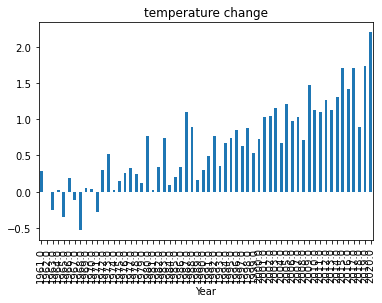

In [178]:
#Graph temperature change for any chosen country

#accept input

val= input("Enter a country: ")
print(val)

#graph
df_country= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].groupby(by="Year").Value.mean()

df_country.plot(kind="bar", title = "temperature change")


#claculate average
average_country_temp_change= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].Value.mean()

rounded_average_country_temp_change = round(average_country_temp_change,3)
print("the average change in temperatrueaway from the norm in " + str(val) + " since 1961 is: ")
print(rounded_average_country_temp_change)

In [ ]:
#global emissions per capita

global_emissions= final2[["Country Name", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emissions.plot(kind= "bar", title= "global emissions per capita in tons of co2")

In [ ]:



#Emissions per capita


valz= input("Enter a country: ")
print(valz)


df_country3= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final["Country Name"] ==valz)].groupby(by="Year").Value_of_Emissions.mean()

df_country3.plot(kind="bar", title = "emissions per capita")


#claculate average
average_country_emissions_per_capita= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final2["Area"] ==valz)].Value_of_Emissions.mean()

rounded_average_country_emissions_per_capita = round(average_country_emissions_per_capita,10)
print("the average emissions per capita in " + str(valz) + " since 1961 is: ")
print(rounded_average_country_emissions_per_capita)




<AxesSubplot:title={'center':'global populaiton'}, xlabel='Year'>

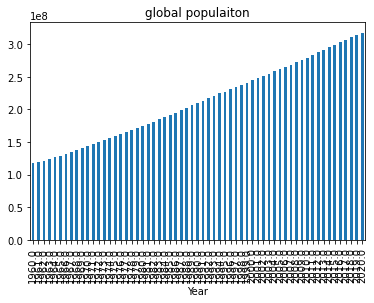

In [287]:
#graph population of earth

global_pop= final2[["Country Name", "Year", "Population"]].groupby(by="Year").Population.mean()
global_pop.plot(kind= "bar", title= "global populaiton")


Enter a country: Iraq
Iraq
the average population over the last 60 years in Iraq is: 
19936289


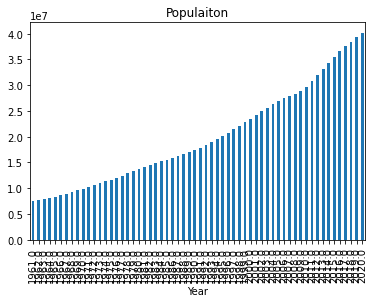

In [305]:
#population of any country

#accept user input
val2= input("Enter a country: ")
print(val2)


df_country3= final2[["Area", "Year", "Population"]].loc[(final["Area"] ==val2)].groupby(by="Year").Population.mean()

df_country3.plot(kind="bar", title = "Populaiton")


#claculate average
average_country_pop= final2[["Area", "Year", "Population"]].loc[(final2["Area"] ==val2)].Population.mean()

rounded_average_country_pop = round(average_country_pop)
print("the average population over the last 60 years in " + str(val2) + " is: ")
print(rounded_average_country_pop)

<AxesSubplot:title={'center':'global emissions per capita'}, xlabel='Year'>

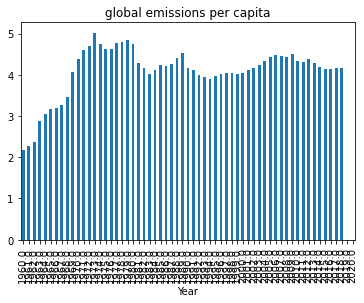

In [382]:
#global emissions
final2.head()

global_emis= final2[["Area", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emis.plot(kind= "bar", title= "global emissions per capita")


Enter a country: France
France
the average emissions over the last 60 years in France is: 
6.744
tons of C02


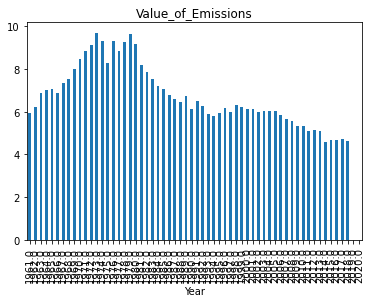

In [253]:
#graph total emissions of any country

val5= input("Enter a country: ")
print(val5)


df_country4= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final["Area"] ==val5)].groupby(by="Year").Value_of_Emissions.mean()

df_country4.plot(kind="bar", title = "Value_of_Emissions")


#claculate average
average_country_emiss= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final2["Area"] ==val2)].Value_of_Emissions.mean()

rounded_average_country_emiss = round(average_country_emiss, 3)
print("the average emissions over the last 60 years in " + str(val5) + " is: ")
print(rounded_average_country_emiss)
print("tons of C02")

usa emission


<AxesSubplot:title={'center':'US per capita emissions over the years'}, xlabel='Year'>

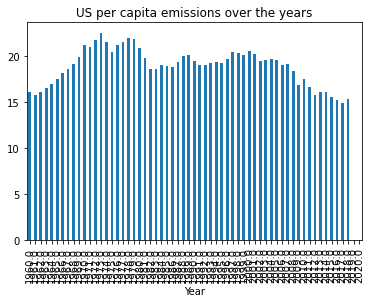

In [383]:
#graph emissions just of usa

print("usa emission")
df_usa= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Value_of_Emissions.mean()

df_usa.plot(kind= "bar", title = "US per capita emissions over the years")



 per capita usa emission


<AxesSubplot:title={'center':'US  per capita emissions over the years'}, xlabel='Year'>

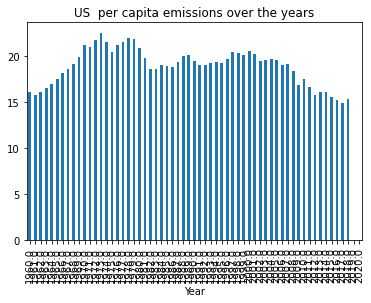

In [386]:
#Graph us per capita emissions

print(" per capita usa emission")
df_usa= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Value_of_Emissions.mean()

df_usa.plot(kind= "bar", title = "US  per capita emissions over the years")



In [319]:
#dataset is missiing Syria and Palestine

final2.head()

df_syria= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="Syria")]
print(df_syria.head(60))

df_palestine= final2[["Country Name", "Year", "Population"]].loc[(final2["Country Name"] =="Palestine")]
print(df_palestine.head(60))

#dataset is missiing Syria and palestine

Empty DataFrame
Columns: [Country Name, Year, Population]
Index: []
Empty DataFrame
Columns: [Country Name, Year, Population]
Index: []


                  Country Name Country Code_x    Year  Value_of_Emissions  \
0                        Aruba            ABW  1960.0                 NaN   
1  Africa Eastern and Southern            AFE  1960.0            0.906060   
2                  Afghanistan            AFG  1960.0            0.046057   
3   Africa Western and Central            AFW  1960.0            0.090880   
4                       Angola            AGO  1960.0            0.100835   

    Population  Total_emissions Area  Value  
0      54208.0              NaN  NaN    NaN  
1  130836765.0     1.185459e+08  NaN    NaN  
2    8996967.0     4.143710e+05  NaN    NaN  
3   96396419.0     8.760463e+06  NaN    NaN  
4    5454938.0     5.500500e+05  NaN    NaN  


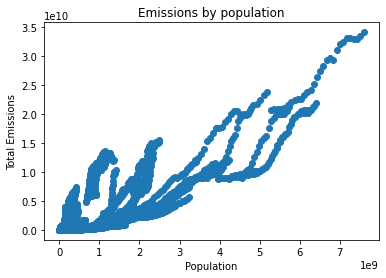

In [388]:
print(final2.head())

import matplotlib.pyplot as plt
plt.scatter(final2["Population"], final2["Total_emissions"])
plt.xlabel("Population")
plt.ylabel("Total Emissions")
plt.title("Emissions by population")
plt.show()

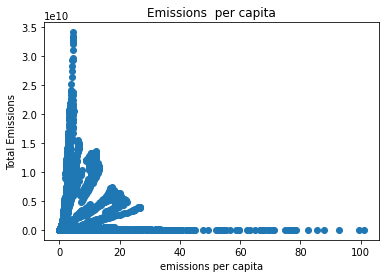

In [392]:
#wait- this doesn't make sense. You'd expect emissions per capita to rise with total emissions

plt.scatter(final2["Value_of_Emissions"], final2["Total_emissions"])
plt.xlabel("emissions per capita")
plt.ylabel("Total Emissions")
plt.title("Emissions  per capita")
plt.show()

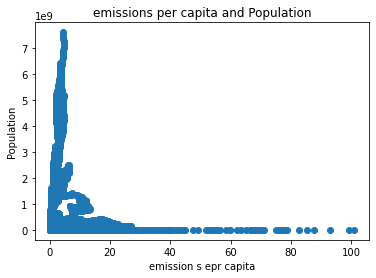

In [394]:
#this shows lower populations having more emissions oer capita
plt.scatter(final2["Value_of_Emissions"], final2["Population"])
plt.xlabel("emission s epr capita")
plt.ylabel("Population")
plt.title("emissions per capita and Population")
plt.show()

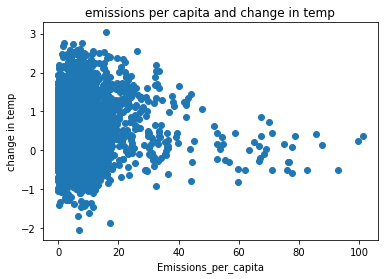

In [396]:
#graphiong emissions oepr capita and change in temp
plt.scatter(final2["Value_of_Emissions"], final2["Value"])
plt.xlabel("Emissions_per_capita")
plt.ylabel("change in temp")
plt.title("emissions per capita and change in temp")
plt.show()

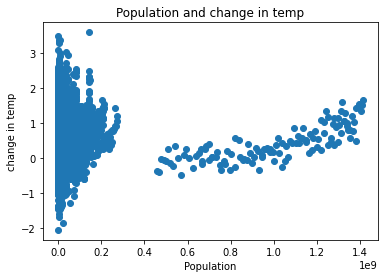

In [336]:
#graphing poulaiton vs change in temp
plt.scatter(final2["Population"], final2["Value"])
plt.xlabel("Population")
plt.ylabel("change in temp")
plt.title("Population and change in temp")
plt.show()

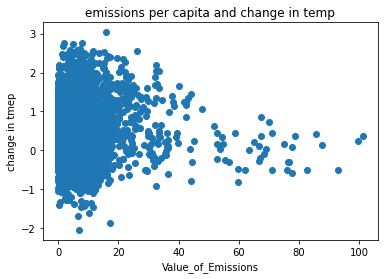

In [397]:
plt.scatter(final2["Value_of_Emissions"], final2["Value"])
plt.xlabel("Value_of_Emissions")
plt.ylabel("change in tmep")
plt.title("emissions per capita and change in temp")
plt.show()

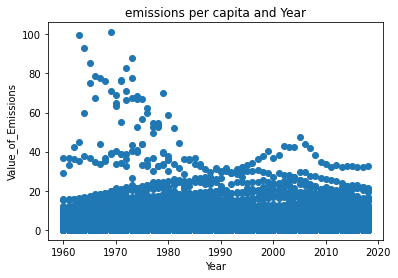

In [398]:
plt.scatter(final2["Year"], final2["Value_of_Emissions"])
plt.xlabel("Year")
plt.ylabel("Value_of_Emissions")
plt.title("emissions per capita and Year")
plt.show()

In [399]:
print(type(final2['Value']))

<class 'pandas.core.series.Series'>


In [ ]:

#drop na values

final3= final2.dropna()

#set x as dependent variables and y as independent variable

x = final3[[ 'Population', 'Value_of_Emissions']]
y = final3['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(x, y)

#put in sample predictive values
predicted_temp_change = regr.predict([[8000000000, 4.5]])
print("If the population is 8000000000, and the per capita C02 output is 4.5, then the expected change in temperature is: ")
print(predicted_temp_change)


print("The average per capita Co2 output is currently 4.7 tos of Co2. The world populaiton is 8 billion")

print("In the US, the per-capita C02 is 15 tons. If the whole world used C02 like the us, the temp change would be: ")
golbal_preidcted_temp_us= regr.predict([[8400000000, 15]])
print(golbal_preidcted_temp_us)

#allow user input

a= input("Choose a populaiton size")
b= input("choose a per capita  amount of tons of Co2 ")


print("If the population is " + str(a) +", and the pe capita C02 output is " + str(b) +", then the expected change in temperature is: ")
user_preidcted_temp= regr.predict([[a, b]])
print(user_preidcted_temp)


In [ ]:
#drop na values

final3= final2.dropna()

#set x as dependent variables and y as independent variable

i = final3[[ 'Population', 'Total_emissions']]
d = final3['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(i, d)

#put in sample predictive values
predicted_temp_change2 = regr.predict([[8000000000, 4000000000]])
print("If the population is 8000000000, and the total C02 output is 4000000000, then the expected change in temperature is: ")
print(predicted_temp_change2)





#allow user input

c= input("Choose a populaiton size")
d= input("choose an amount of tons of Co2 ")


print("If the population is " + str(c) +", and the C02 output is " + str(d) +", then the expected change in temperature is: ")
user_preidcted_temp2= regr.predict([[c, d]])
print(user_preidcted_temp2)

print("currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year.")


In [ ]:
#set x as dependent variables and y as independent variable

i = final3[[ 'Population', 'Total_emissions', "Year"]]
d = final3['Value']

#import regression modeling ability
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(i, d)

#put in sample predictive values
predicted_temp_change3 = regr.predict([[8000000000, 40000000000, 2025]])
print("In 2025, If the population is 8 billion, and the total C02 output is 40 billion, then the expected change in temperature is: ")
print(predicted_temp_change3)


print("currently, the earth's populaiton is 8 billion, and 34 billions tons of Co2 are prudcued each year.")

#allow user input

c= input("Choose a populaiton size")
d= input("choose an amount of tons of Co2 ")
e= input("year")

print("In the year " + str(e) + " If the population is " + str(c) +", and the C02 output is " + str(d) +", then the expected change in temperature is: ")
user_preidcted_temp3= regr.predict([[c, d, e]])
print(user_preidcted_temp3)


